## data storm 4.0 group 095

### import needed libraries

In [16]:
import pandas as pd
import numpy as nps

### import data into code

In [17]:
transaction_data=pd.read_csv("../data/Historical-transaction-data.csv")
store_data=pd.read_csv("../data/Store-info.csv")

get the first few rows of the transaction_data and store_data

In [18]:
store_data.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [19]:
transaction_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5


## Data pre-processing

### remove unwnated data and get the important data

In this step,we have to extract the details from the transaction_data.we think most important feature is the price. we also have to consider the number of items,the number of customers,number of different items sold

we know that each row should be unique becuase if shop buy same product then quantity_sold should be increased.we think if duplicate row means there is a problem in data entering.data set should be consistent.so we have to remove duplicate values

In [20]:
duplicate_invoice=transaction_data.duplicated().sum()
print("number of duplicate invoices = ",duplicate_invoice)

number of duplicate invoices =  31211


In [21]:
print("duplicate columns as percentage = ",duplicate_invoice/transaction_data.shape[0]*100)

duplicate columns as percentage =  6.58496035647525


In [22]:
# to drop the duplicates
transaction_data=transaction_data.drop_duplicates()

to group by shop_id

In [23]:
grouped_transaction_data = transaction_data.groupby('shop_id')

In [24]:
grouped_transaction_data.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
5031,NaN,2021-10-15T00:00:00.000Z,1471067.0,W8QK,SHOP072,70,1
5032,CREAM SODA 500ML,2021-10-16T00:00:00.000Z,1471404.0,6JBA,SHOP072,100,2
5035,CREAM SODA 500ML,2021-10-16T00:00:00.000Z,1471404.0,6JBA,SHOP072,100,0
5036,GINGER BEER 1.5L,2021-10-16T00:00:00.000Z,1471453.0,0XKY,SHOP072,220,2


### to get the number of unique values for given column

In [25]:
for col in transaction_data.columns:
    print(col," number of unique values = ",transaction_data[col].nunique())

item_description  number of unique values =  37
transaction_date  number of unique values =  62
invoice_id  number of unique values =  343342
customer_id  number of unique values =  191636
shop_id  number of unique values =  124
item_price  number of unique values =  209
quantity_sold  number of unique values =  69


In [26]:
# transaction_data_SHOP008 = transaction_data[transaction_data['shop_id'] == 'SHOP008']
# transaction_data_SHOP008.shape

### to get the number of missing values for each colum

In [27]:
for col in transaction_data.columns:
    print(col," number of missing values = ",transaction_data[col].isna().sum())

item_description  number of missing values =  35066
transaction_date  number of missing values =  0
invoice_id  number of missing values =  5769
customer_id  number of missing values =  0
shop_id  number of missing values =  0
item_price  number of missing values =  0
quantity_sold  number of missing values =  0


so , that we don't need to use any missing value technic to haddle the missing values in the dataset because we only need price as a multiplication of item_price and quantity_sold. we can also take number of quatity sold by each shop without any problem.we can also take the unique number of customers for each shop because this column also don't have any missing values.

we have to take the number of unique items for each shop.but there are some missing values for that column.but we need only the number of unique values.if we fill the missing values.sometimes,this give an error.so we don't fill item_description column

to get the number of unique shop ids 

In [28]:
unique_shop_id_names = store_data['shop_id'].unique()
print("number of unique shops = ",store_data['shop_id'].nunique())

number of unique shops =  124


we have to find the number of missing values for each column in store_data

In [29]:
for col in store_data.columns:
    print(col," number of missing values = ",store_data[col].isna().sum())

shop_id  number of missing values =  0
shop_area_sq_ft  number of missing values =  0
shop_profile  number of missing values =  24


we can see number of missing values shop_id and shop_area_sq_ft is zero.so,we don't need to use handling misssing values techniques because last shop ids are given to predict

we have to get the get the ids of shops to train and predict

In [30]:
train_shop_id_names=[]
predict_shop_id_names=[]
for ind in store_data.index:
    if(pd.isna(store_data['shop_profile'][ind])):
        predict_shop_id_names+=[store_data["shop_id"][ind]]
    else:
        train_shop_id_names+=[store_data["shop_id"][ind]]
print(store_data["shop_profile"][ind])

nan


In [31]:
print("number of shop_id for train = ",len(train_shop_id_names))
print("number of shop_id for predict = ",len(predict_shop_id_names))

number of shop_id for train =  100
number of shop_id for predict =  24


###  create new dataset using previous data

we have to build new  columns using the transaction_data dataset

they are, num_unique_items,
          num_unique_customers,
          quantity_items,
          total_price
          
we also have to add shop_id,shop_area_sq_ft,shop_profile

In [32]:
# to create column for total for item
transaction_data["total_for_items"]=transaction_data["quantity_sold"]*transaction_data["item_price"]

In [33]:
col_names_x=['shop_id','num_unique_items','num_unique_customers','quantity_items','total_price','shop_area_sq_ft']

main_data_x=pd.DataFrame(columns=col_names_x)
main_data_y=pd.DataFrame(columns=['shop_id',"shop_profile"]) 

In [34]:
for shop_id in train_shop_id_names:
    #print(shop_id)
    data_shop=transaction_data[transaction_data['shop_id'] == shop_id]
    #print(data_shop.head())
    num_unique_items=data_shop["item_description"].nunique()
    num_unique_customers=data_shop["customer_id"].nunique()
    quantity_items=data_shop["quantity_sold"].nunique()
    total_price=data_shop["total_for_items"].sum()
    #print("num_unique_items = ",num_unique_items,' num_unique_customers = ',num_unique_customers," quantity_items = ",quantity_items," total_price =",total_price)
    store_data_new=store_data[store_data['shop_id'] == shop_id]
    shop_area_sq_ft=store_data_new["shop_area_sq_ft"].iloc[0]
    shop_profile=store_data_new["shop_profile"].iloc[0]
    #print("shop_area_sq_ft = ",shop_area_sq_ft,' shop_profile = ',shop_profile)
    new_row_x={'shop_id':shop_id,'num_unique_items':num_unique_items,'num_unique_customers':num_unique_customers,'quantity_items':quantity_items,'total_price':total_price,'shop_area_sq_ft':shop_area_sq_ft}
    new_row_y={'shop_id':shop_id,'shop_profile':shop_profile}
    main_data_x=pd.concat([main_data_x, pd.DataFrame(new_row_x, index=[0])], ignore_index=True)
    main_data_y=pd.concat([main_data_y, pd.DataFrame(new_row_y, index=[0])], ignore_index=True)
    
    

make index as the "shop_id"

In [35]:
main_data_x.set_index("shop_id", inplace=True)
main_data_y.set_index("shop_id", inplace=True)
# main_data_x = main_data_x.drop("shop_id", axis=1)
# main_data_y = main_data_y.drop("shop_id", axis=1)

In [36]:
main_data_x.head()

,num_unique_items,num_unique_customers,quantity_items,total_price,shop_area_sq_ft
shop_id,,,,,
SHOP047,35,928,14,802525,528
SHOP009,35,2498,18,1891660,676
SHOP083,36,1900,17,1614960,676
SHOP117,35,2037,19,2235870,676
SHOP042,35,1841,16,1276790,676


### shapes of the dataset

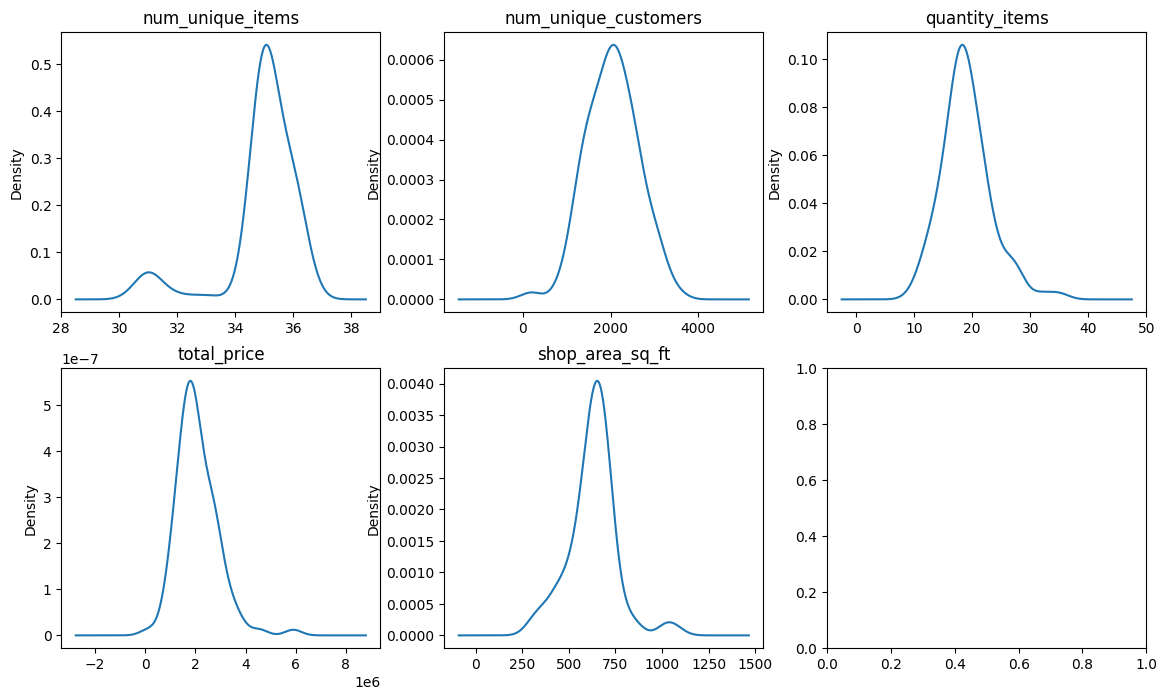

In [37]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(14,8))

i=0
for col in main_data_x.columns:
    main_data_x[col].plot(kind='kde',ax=axes[i//3,i%3],title=col)
    i+=1

### find outliers columns

In [38]:
import numpy as np
# Calculate z-scores for each column
z_scores = np.abs((main_data_x - main_data_x.mean()) / main_data_x.std())

# Identify columns with at least one outlier
outlier_cols = z_scores.columns[z_scores.max() > 3].tolist()

# Print outlier columns
print("Outlier columns:", outlier_cols)

Outlier columns: ['num_unique_items', 'num_unique_customers', 'quantity_items', 'total_price', 'shop_area_sq_ft']


### remove outliers 

In [39]:
# # Calculate z-scores for each column
# z_scores = np.abs((main_data_x - main_data_x.mean()) / main_data_x.std())

# # Replace outliers with median
# median = main_data_x.median()
# removed_outlier_main_data_x = main_data_x.mask(z_scores > 3, median, axis=1)

Removing outliers can help to mitigate the effects of overfitting and improve the performance of the model. However, it's important to carefully consider which data points are considered outliers and whether they should be removed. Some outliers may be genuine data points that are important for the problem you are trying to solve, and removing them may lead to a loss of valuable information.

#### we know that Moderate is better than Low.High is better than Moderate.so that "shop_profile" is an ordinal data

In [40]:
main_data_y["shop_profile"].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

we replace Low=0,Moderate=1,High=2

In [41]:
main_data_y["shop_profile"] = pd.Categorical(main_data_y["shop_profile"], categories=['Low', 'Moderate', 'High'], ordered=True).codes

In [ ]:
### drop shop 8


### import neeeded libraries for testing

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### Split the dataset into training and testing sets

In [43]:
X_train, X_test, y_train, y_test = train_test_split(main_data_x, main_data_y, test_size=0.3, random_state=42)

#### for testing purpose we need only one column.so that get only one column

In [44]:
y_train = y_train['shop_profile'].values.ravel()
y_test = y_test['shop_profile'].values.ravel()

### Random Forest Classifier

In [45]:
# Choose hyperparameters
n_estimators = 200
max_depth = 50


# Train the model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(X_train, y_train)


# Evaluate the model
score = model.score(X_test, y_test)
print("Accuracy using model: {:.2f}%".format(score * 100))

# Predict with the model
y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')

print('F1 score for random forest :', f1)

Accuracy using model: 76.67%
F1 score for random forest : 0.7673486786018755


### KNN alorithm

In [46]:
knn = KNeighborsClassifier(n_neighbors=1)

# train the model
knn.fit(X_train, y_train)

# predict the classes for the test set
y_pred = knn.predict(X_test)

# calculate the accuracy of the model
f1 = f1_score(y_test, y_pred, average='weighted')

print('F1 score:', f1)

F1 score: 0.6058574879227053


### Cross validation score for Random Forest

In [47]:
from sklearn.model_selection import cross_val_score

n_estimators = 200
max_depth = 50

main_data_y_cross = main_data_y['shop_profile'].values.ravel()

# Train the model
rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
scores = cross_val_score(rf, main_data_x,main_data_y_cross, cv=3)
f1_scores = cross_val_score(rf,main_data_x,main_data_y_cross, cv=3, scoring='f1_macro')

print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())
print("F1 score:", f1_scores.mean())

Mean score: 0.6007130124777184
Standard deviation: 0.050417595806527445
F1 score: 0.5676345259678593


## save data to file

In [48]:
import pandas as pd
col_names_x=['shop_id','num_unique_items','num_unique_customers','quantity_items','total_price','shop_area_sq_ft']

test_data_x=pd.DataFrame(columns=col_names_x)
test_data_y=pd.DataFrame(columns=['shop_id',"shop_profile"])

In [49]:
for shop_id in predict_shop_id_names:
    #print(shop_id)
    data_shop=transaction_data[transaction_data['shop_id'] == shop_id]
    #print(data_shop.head())
    num_unique_items=data_shop["item_description"].nunique()
    num_unique_customers=data_shop["customer_id"].nunique()
    quantity_items=data_shop["quantity_sold"].nunique()
    total_price=data_shop["total_for_items"].sum()
    #print("num_unique_items = ",num_unique_items,' num_unique_customers = ',num_unique_customers," quantity_items = ",quantity_items," total_price =",total_price)
    store_data_new=store_data[store_data['shop_id'] == shop_id]
    shop_area_sq_ft=store_data_new["shop_area_sq_ft"].iloc[0]
    shop_profile=store_data_new["shop_profile"].iloc[0]
    #print("shop_area_sq_ft = ",shop_area_sq_ft,' shop_profile = ',shop_profile)
    new_row_x={'shop_id':shop_id,'num_unique_items':num_unique_items,'num_unique_customers':num_unique_customers,'quantity_items':quantity_items,'total_price':total_price,'shop_area_sq_ft':shop_area_sq_ft}
    new_row_y={'shop_id':shop_id,'shop_profile':shop_profile}
    test_data_x=pd.concat([test_data_x, pd.DataFrame(new_row_x, index=[0])], ignore_index=True)
    test_data_y=pd.concat([test_data_y, pd.DataFrame(new_row_y, index=[0])], ignore_index=True)

In [50]:
test_data_x.set_index("shop_id", inplace=True)
# test_data_x = test_data_x.drop("shop_id", axis=1)

In [51]:
main_data_y

,shop_profile
shop_id,
SHOP047,1
SHOP009,2
SHOP083,0
SHOP117,0
SHOP042,0
...,...
SHOP124,2
SHOP012,0
SHOP093,2


### save data using Random Forest

to change to ravel

In [52]:
main_data_y= main_data_y['shop_profile'].values.ravel()

In [53]:
# Choose hyperparameters
n_estimators = 200
max_depth = 50


# Train the model
model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
model.fit(main_data_x, main_data_y)


# Predict with the model
y_pred_test = model.predict(test_data_x)

print(y_pred_test)

[2 0 1 1 1 2 0 0 2 0 2 0 0 2 1 0 0 2 2 1 0 0 2 0]


#### covert into again y_pred_test into 'Low', 'Moderate', 'High'

In [54]:
y_pred_test = ["Low" if item==0 else "Moderate" if item==1 else "High" for item in y_pred_test]

In [55]:
print(y_pred_test)

['High', 'Low', 'Moderate', 'Moderate', 'Moderate', 'High', 'Low', 'Low', 'High', 'Low', 'High', 'Low', 'Low', 'High', 'Moderate', 'Low', 'Low', 'High', 'High', 'Moderate', 'Low', 'Low', 'High', 'Low']


In [56]:
test_data_y['shop_profile'] = y_pred_test

In [57]:
test_data_y.head()

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,Low
2,SHOP023,Moderate
3,SHOP097,Moderate
4,SHOP044,Moderate


#### Save into the file

In [58]:
test_data_y.to_csv('Testing-data-2.csv', index=False)

### end